In [ ]:
import bnlearn as bn
from sklearn.metrics import f1_score
import numpy as np


In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Titanic


[df2onehot] >Auto detecting dtypes.


100%|██████████| 12/12 [00:00<00:00, 176.11it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 12/12 [00:00<00:00, 209.40it/s]

[df2onehot] >Total onehot features: 19


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


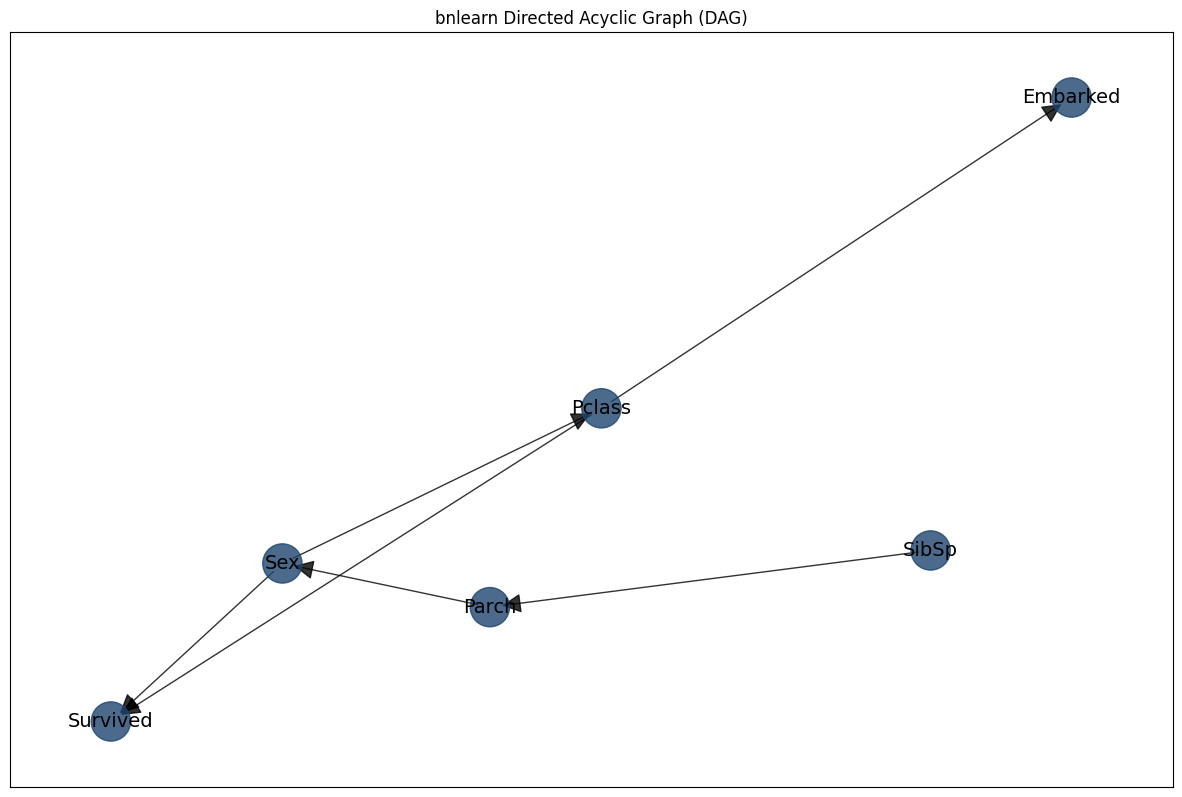

In [ ]:
# Load titanic dataset containing mixed variables
df_raw = bn.import_example(data='titanic')

# Pre-processing of the input dataset
dfhot, dfnum = bn.df2onehot(df_raw)

# Structure learning
DAG = bn.structure_learning.fit(dfnum, verbose = 0)

# Plot
G = bn.plot(DAG)

In [ ]:
model = bn.parameter_learning.fit(DAG, dfnum)


[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Pclass:
+-----------+---------------------+---------------------+
| Sex       | Sex(0)              | Sex(1)              |
+-----------+---------------------+---------------------+
| Pclass(1) | 0.3202293202293202  | 0.2680284741566078  |
+-----------+---------------------+---------------------+
| Pclass(2) | 0.29811629811629814 | 0.2550294026617146  |
+-----------+---------------------+---------------------+
| Pclass(3) | 0.38165438165438165 | 0.47694212318167745 |
+-----------+---------------------+---------------------+
[bnlearn] >CPD of Survived:
+-------------+---------------------+-----+-----------+---------------------+
| Pclass      | Pclass(1)           | ... | Pclass(3) | Pclass(3)           |
+-------------+---------------------+-----+-----------+-------------------

In [ ]:

# Make inference
q = bn.inference.fit(model, variables=['Survived'], evidence={'Sex':0, 'Pclass':1}, verbose = 0)

q.df

,Survived,p
0,0,0.331202
1,1,0.668798


### Sprinkler

In [ ]:
model_true = bn.import_DAG('sprinkler')

df = bn.sampling(model_true, n=10000)
# Structure learning of sampled dataset
model_learned = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic', verbose = 0)

model_learned['adjmat']


[bnlearn] >Import <sprinkler>
[bnlearn] >Check whether CPDs sum up to one.


target,Cloudy,Sprinkler,Rain,Wet_Grass
source,,,,
Cloudy,False,True,False,False
Sprinkler,False,False,False,True
Rain,True,False,False,True
Wet_Grass,False,False,False,False


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


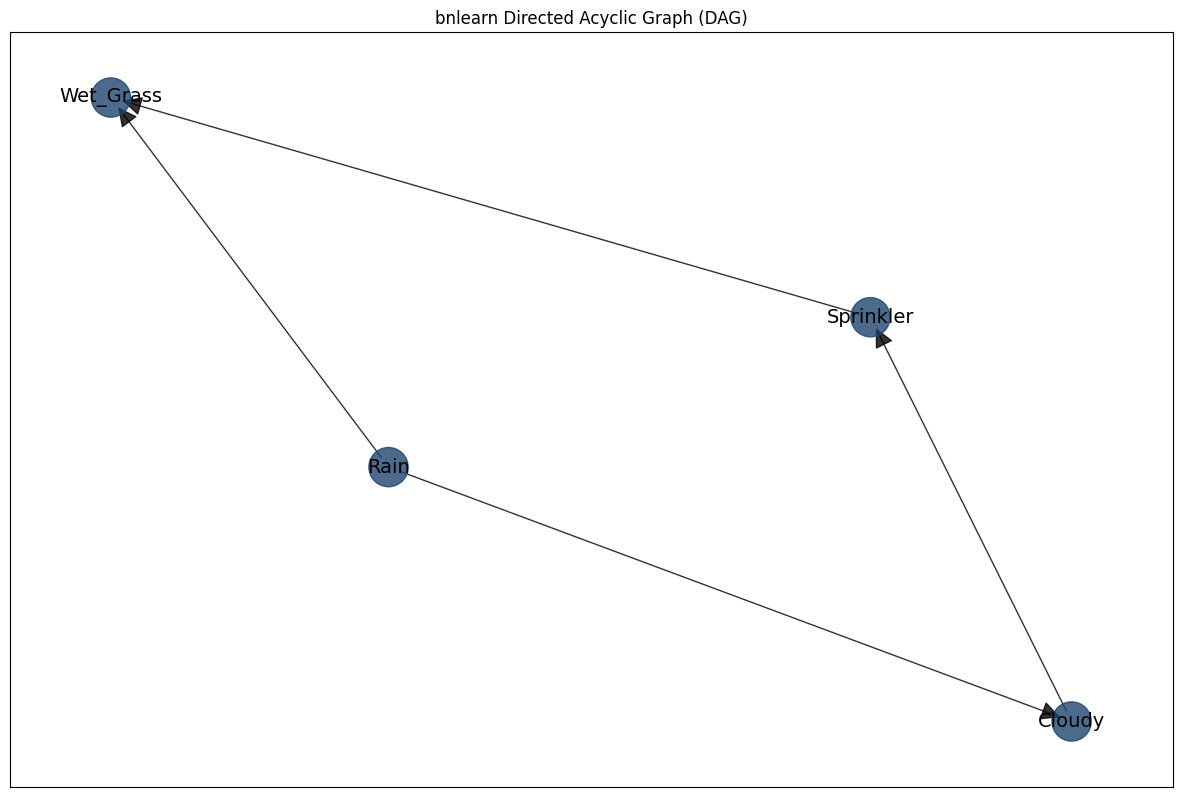

In [ ]:
G = bn.plot(model_learned)

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


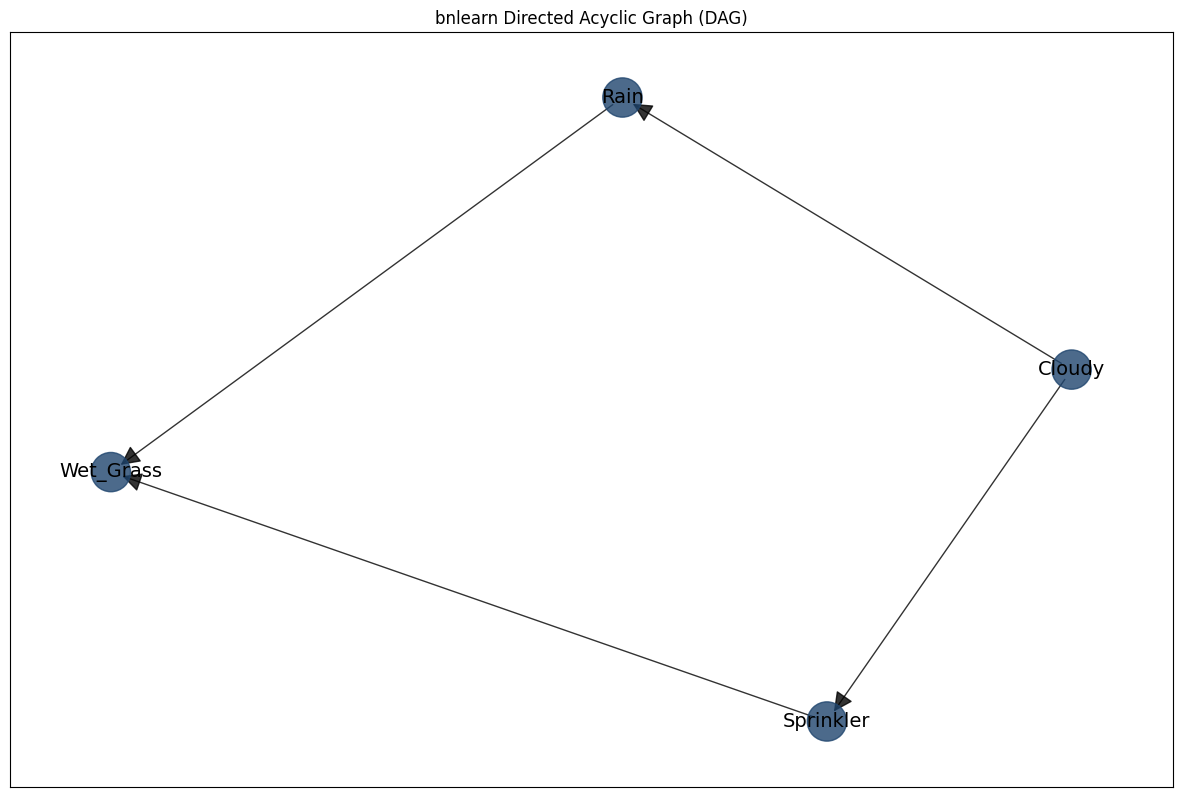

In [ ]:
G = bn.plot(model_true)

### Asia Dataset

[bnlearn] >Import <asia>
[bnlearn] >Loading bif file <c:\Users\YASH MANIYA\AppData\Local\Programs\Python\Python39\lib\site-packages\datazets\data\asia.bif>
[bnlearn] >Check whether CPDs sum up to one.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


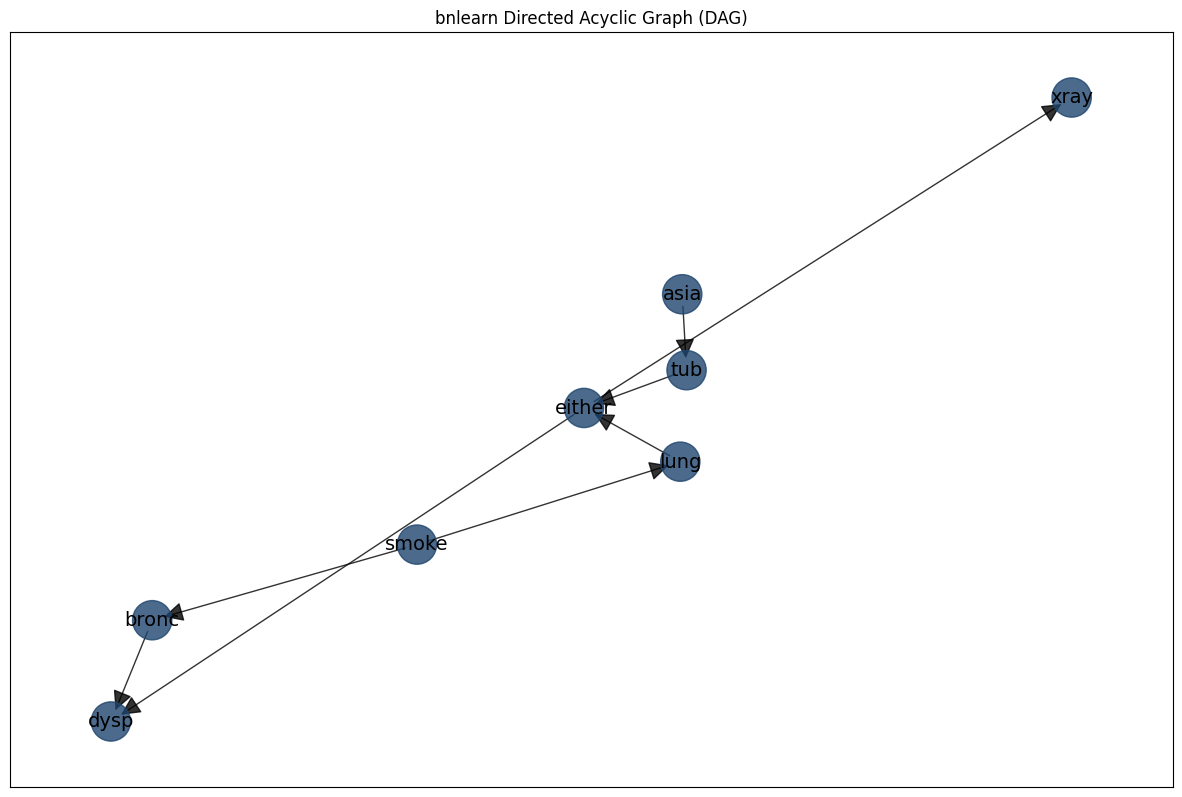

In [ ]:
model_true = bn.import_DAG('asia')
# plot ground truth
G = bn.plot(model_true)

In [ ]:
df = bn.sampling(model_true, n=10000)
# Structure learning of sampled dataset
model_learned = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic', verbose = 0)

### Predicted DAG Model vs True DAG Model

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Existing coordinates from <pos> are used.


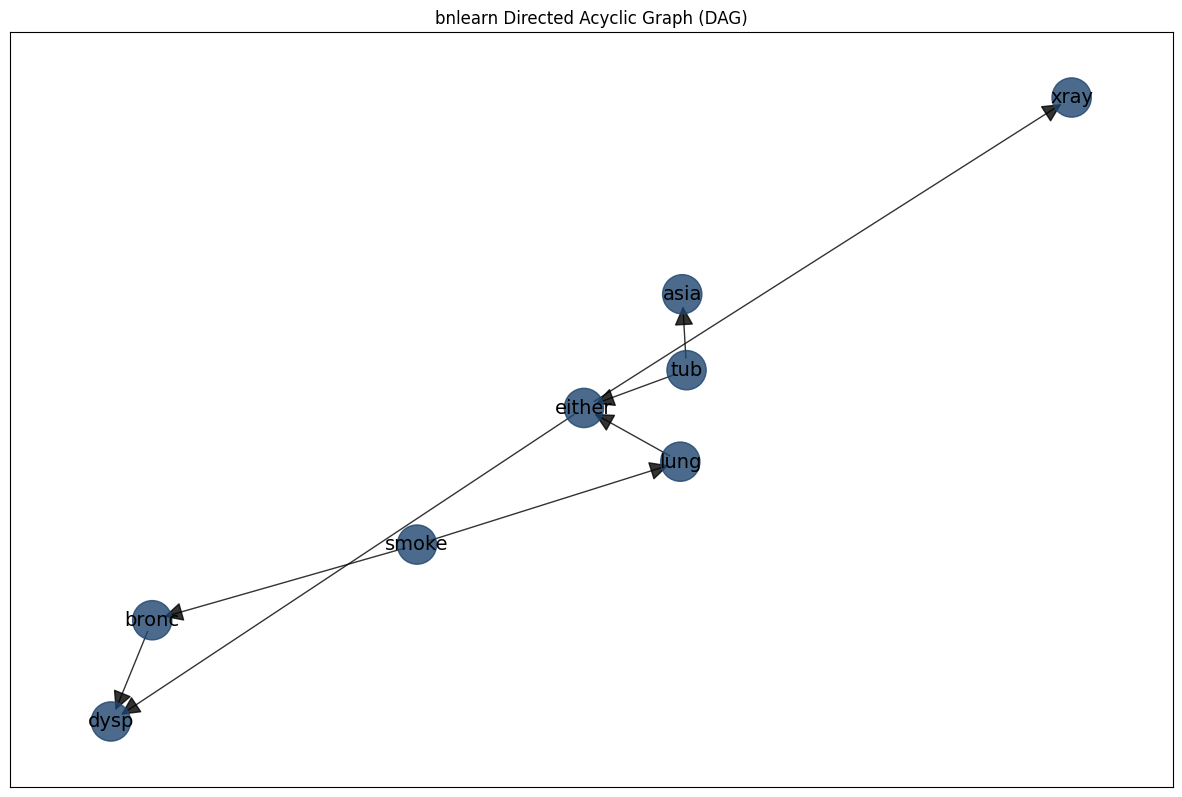

[bnlearn] >Existing coordinates from <pos> are used.


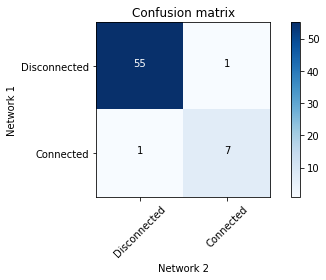

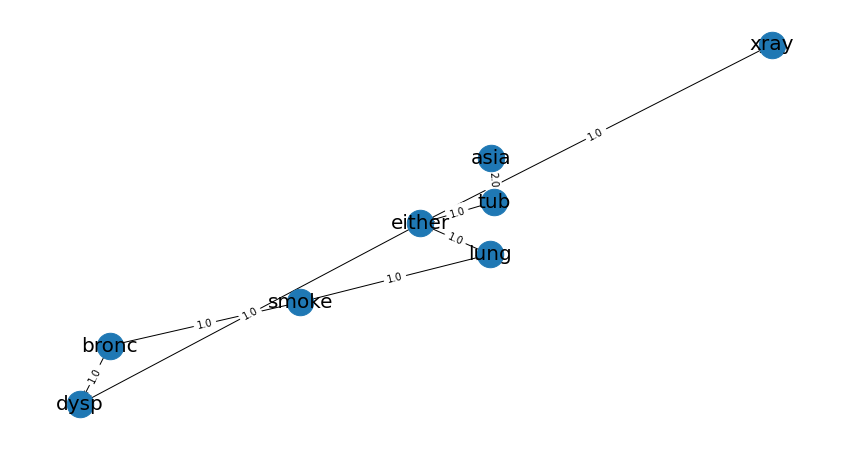

(array([[55,  1],
        [ 1,  7]], dtype=int64),
 target  asia  tub  smoke  lung  bronc  either  xray  dysp
 source                                                   
 asia       0   -1      0     0      0       0     0     0
 tub        2    0      0     0      0       1     0     0
 smoke      0    0      0     1      1       0     0     0
 lung       0    0      0     0      0       1     0     0
 bronc      0    0      0     0      0       0     0     1
 either     0    0      0     0      0       0     1     1
 xray       0    0      0     0      0       0     0     0
 dysp       0    0      0     0      0       0     0     0)

In [ ]:
bn.plot(model_learned, pos=G['pos'])
# Compare networks and make plot
bn.compare_networks(model_true, model_learned, pos=G['pos'])